Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Be

Epoch 1/10


38/38 [==============================] - 100s 813ms/step - loss: 0.8129 - accuracy: 0.5201 - val_loss: 0.6966 - val_accuracy: 0.4933
Epoch 2/10
38/38 [==============================] - 21s 556ms/step - loss: 0.7544 - accuracy: 0.5017 - val_loss: 0.9491 - val_accuracy: 0.5067
Epoch 3/10
38/38 [==============================] - 22s 569ms/step - loss: 0.7683 - accuracy: 0.5050 - val_loss: 0.7017 - val_accuracy: 0.4933
Epoch 4/10
38/38 [==============================] - 22s 591ms/step - loss: 0.7057 - accuracy: 0.5184 - val_loss: 0.8545 - val_accuracy: 0.4933
Epoch 5/10
38/38 [==============================] - 21s 554ms/step - loss: 0.7285 - accuracy: 0.4866 - val_loss: 0.6968 - val_accuracy: 0.4933
Epoch 6/10
38/38 [==============================] - 22s 590ms/step - loss: 0.7465 - accuracy: 0.5084 - val_loss: 0.7368 - val_accuracy: 0.5067
Epoch 7/10
38/38 [==============================] - 21s 561ms/step - loss: 0.7100 - accuracy: 0.5351 - val_loss: 0.7032 - val_accuracy: 0.5067
Epoch 8/1

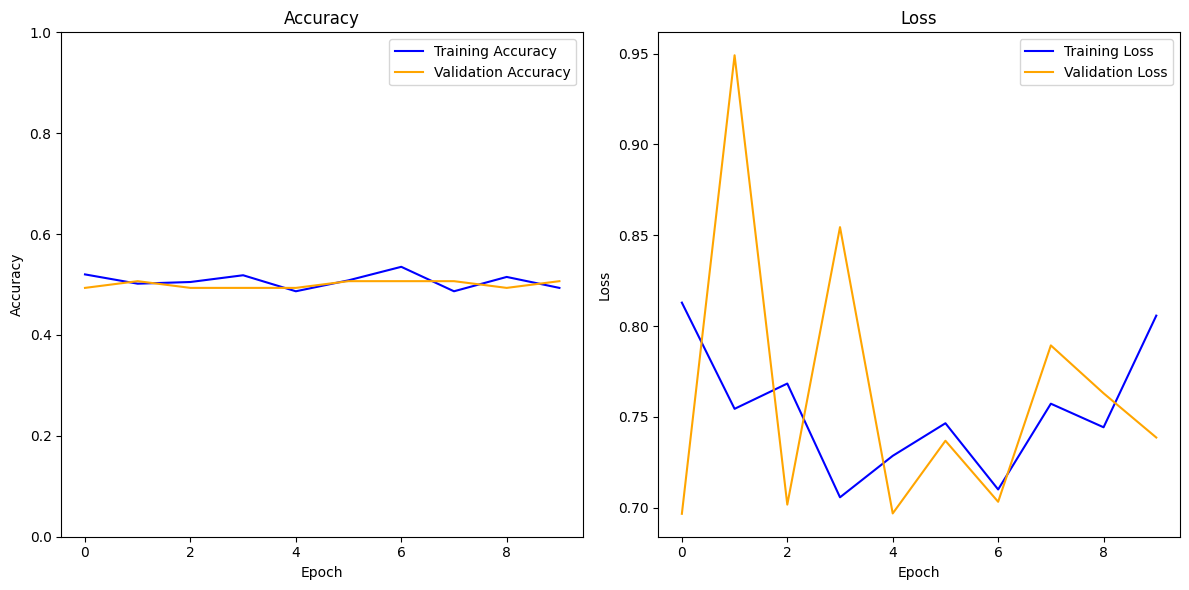

10/10 [==============================] - 1s 147ms/step - loss: 0.7386 - accuracy: 0.5067


In [ ]:
A# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
!pip install transformers

# Import necessary libraries
import tensorflow as tf
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Assuming 'imdb_sentiment.csv' is uploaded directly to Colab
dataset_path = '/content/imdb_sentiment.csv'
imdb_sentiment = pd.read_csv(dataset_path)

# Preprocess the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(imdb_sentiment['review'], imdb_sentiment['sentiment'], test_size=0.2, random_state=42)

# Load pre-trained XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetForSequenceClassification.from_pretrained('xlnet-base-cased')

# Tokenize and encode the text data
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)  # Limit sequence length
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)  # Limit sequence length

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train_labels.tolist())
test_labels = tf.convert_to_tensor(test_labels.tolist())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

# Fine-tune XLNet model for five epochs with reduced batch size

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=10, batch_size=16, validation_data=test_dataset.shuffle(1000).batch(16))


# Print the history
print("Training history:", history.history)

# Plot bar graphs of accuracy, validation accuracy, loss, and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values (line graph)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# Plot training & validation loss values (line graph)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
model.evaluate(test_dataset.batch(16))  # Adjusted batch size for evaluation

# Save the model to Google Drive
model.save_pretrained('/content/drive/MyDrive/models/imdb_sentiment_xlnet_model')
